Practice Project - 5

# Titanic Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster.

# Attribute Information

Survived: Outcome of survival (0 = No; 1 = Yes)  
Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)  
Name: Name of passenger  
Sex: Sex of the passenger  
Age: Age of the passenger (Some entries contain NaN)  
SibSp: Number of siblings and spouses of the passenger aboard  
Parch: Number of parents and children of the passenger aboard  
Ticket: Ticket number of the passenger  
Fare: Fare paid by the passenger  
Cabin: Cabin number of the passenger (Some entries contain NaN)  
Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)  

Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset
df_ti=pd.read_csv("titanic_train.csv")
df_ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# First 5 rows
df_ti.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Last 5 rows
df_ti.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# Sample
df_ti.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
356,357,1,1,"Bowerman, Miss. Elsie Edith",female,22.0,0,1,113505,55.0000,E33,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S


In [6]:
df_ti.shape

(891, 12)

This dataset contains 891 rows and 12 columns.

# EDA

In [7]:
# Column Names
df_ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
# Column Data Types
df_ti.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Checking for null values
df_ti.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Sum of null values if any...
df_ti.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

From the above observation we see that there are null values present in "Age", "Cabin" & "Embarked" columns.

<AxesSubplot:>

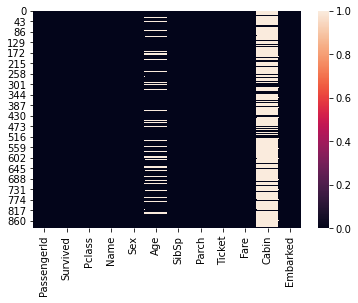

In [11]:
# Heatmap of null values
sns.heatmap(df_ti.isnull())

We can see that the "Cabin" feature has a lot of missing values. The "Age" feature, also has some missing values. There are only 2 missing values in "Embarked" feature.

# Treating Null Values

In [12]:
df_ti['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
common_value = 'S'
df_ti['Embarked'] = df_ti['Embarked'].fillna(common_value)

In [14]:
df_ti['Embarked'].isnull().sum()

0

In [15]:
df_ti['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [16]:
df_ti['Age'].fillna(df_ti['Age'].mean(),inplace=True)

In [17]:
df_ti['Age'].isnull().sum()

0

In [18]:
df_ti['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
E101           3
              ..
T              1
E77            1
C87            1
B37            1
D37            1
Name: Cabin, Length: 147, dtype: int64

There are way too many null values in the "cabin" column of the dataset, we won't be able to impute this column properly. Since, it has no relation towards our target variable "Survived", we will drop this column.

In [19]:
df_ti=df_ti.drop(columns='Cabin',axis=1)

In [20]:
df_ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [21]:
df_ti.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:>

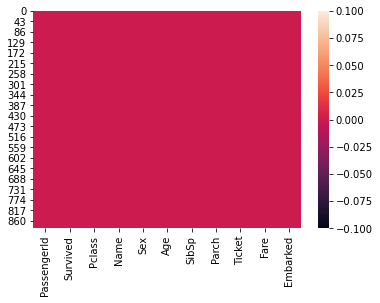

In [22]:
sns.heatmap(df_ti.isnull())

In [23]:
df_ti.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
# Means of our target variable 'Survived'
df_ti.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


In [25]:
df_ti.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:>

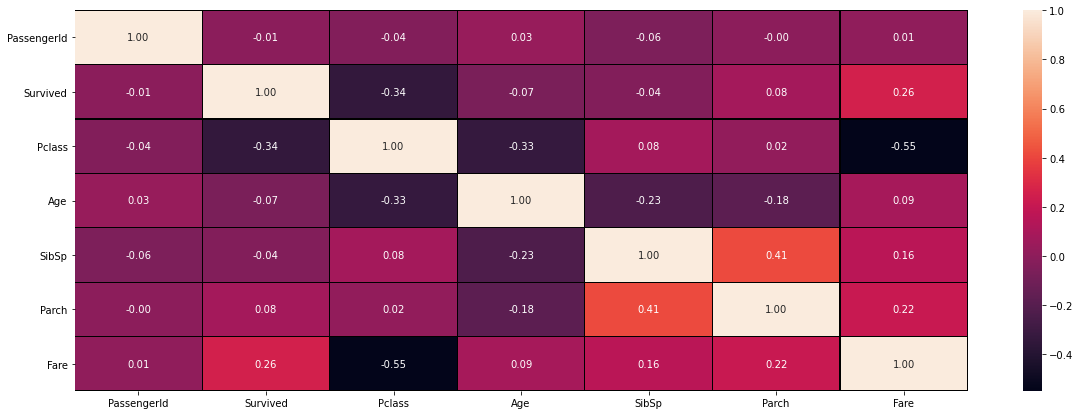

In [26]:
# Visualizing df_ti.corr() using heatmap
plt.figure(figsize=(20,7))
sns.heatmap(df_ti.corr(),annot=True,linewidths=0.1,linecolor="black",fmt=".2f")

In [27]:
df_ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [28]:
# Unique values of columns
df_ti.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [29]:
# Unique values of target variable column
df_ti['Survived'].unique()

array([0, 1], dtype=int64)

In [30]:
df_ti['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data Visualization

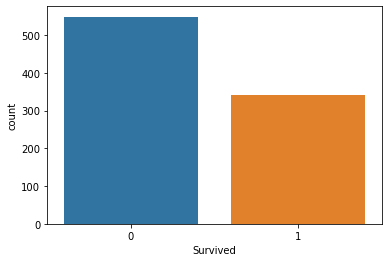

In [31]:
sns.countplot(df_ti['Survived'])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

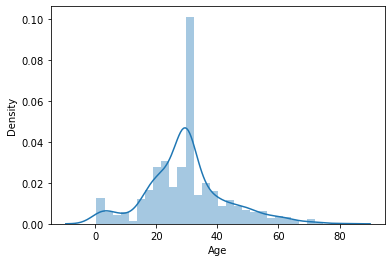

In [32]:
sns.distplot(df_ti['Age'])

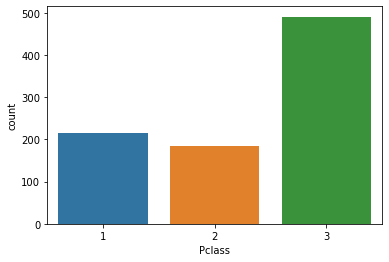

In [33]:
sns.countplot(df_ti['Pclass'])
plt.show()

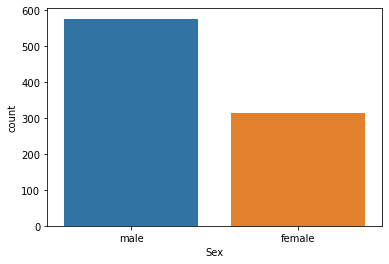

In [34]:
sns.countplot(df_ti['Sex'])
plt.show()

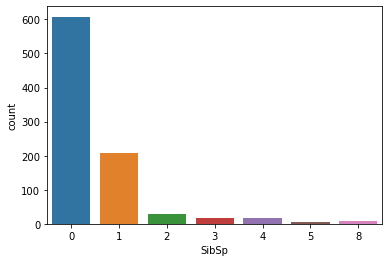

In [35]:
sns.countplot(df_ti['SibSp'])
plt.show()

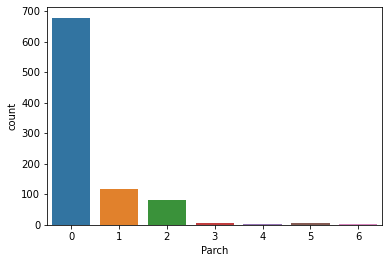

In [36]:
sns.countplot(df_ti['Parch'])
plt.show()

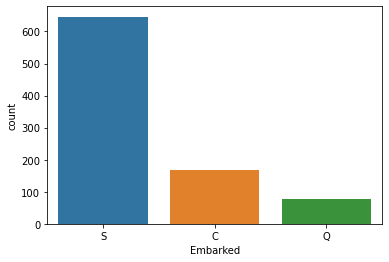

In [37]:
sns.countplot(df_ti['Embarked'])
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

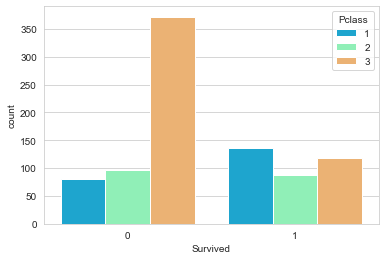

In [38]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

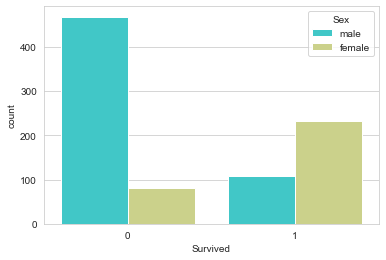

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

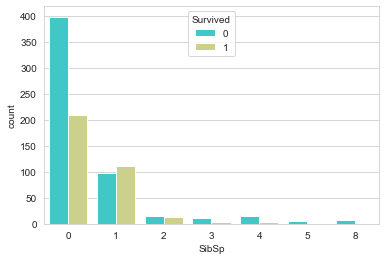

In [40]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',hue='Survived',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='Parch', ylabel='count'>

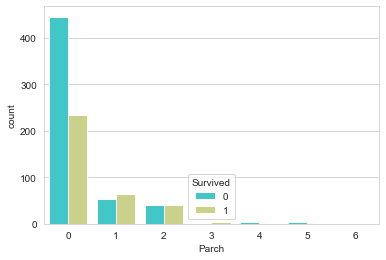

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Parch',hue='Survived',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

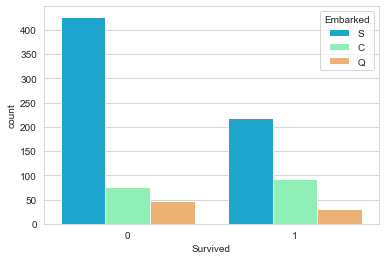

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

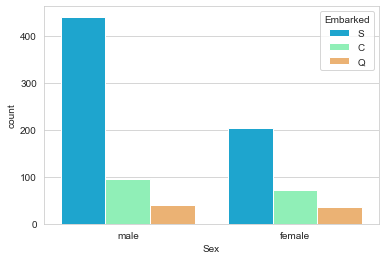

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Embarked',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

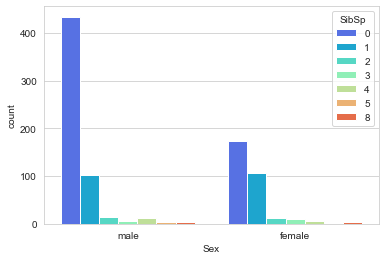

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='SibSp',data=df_ti,palette='rainbow')

<AxesSubplot:xlabel='Sex', ylabel='count'>

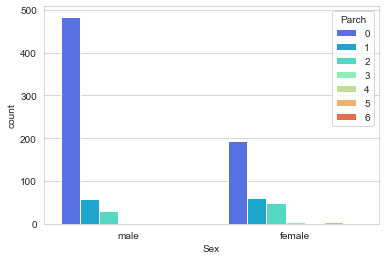

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Parch',data=df_ti,palette='rainbow')

array([<AxesSubplot:ylabel='Survived'>], dtype=object)

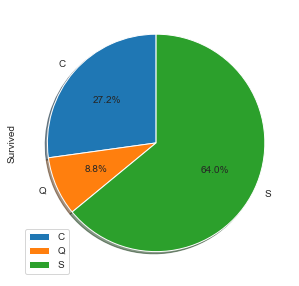

In [46]:
df_ti.groupby(['Embarked']).sum().plot(kind='pie',y='Survived',subplots=True,shadow=True,startangle=90,figsize=(5,5),autopct='%1.1f%%')

array([<AxesSubplot:ylabel='Survived'>], dtype=object)

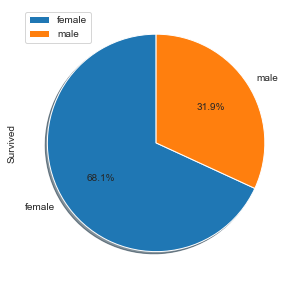

In [47]:
df_ti.groupby(['Sex']).sum().plot(kind='pie',y='Survived',subplots=True,shadow=True,startangle=90,figsize=(5,5),autopct='%1.1f%%')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

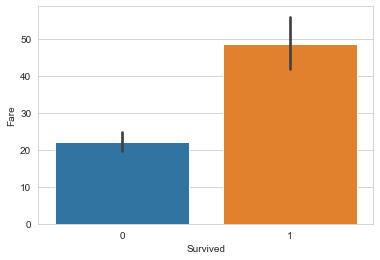

In [48]:
sns.barplot(df_ti['Survived'], df_ti['Fare'])

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

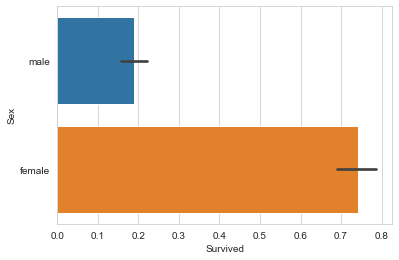

In [49]:
sns.barplot(df_ti['Survived'], df_ti['Sex'])

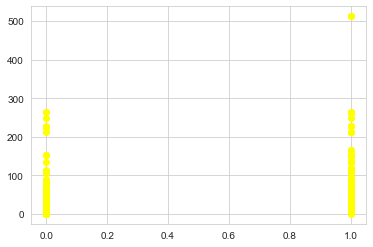

In [50]:
plt.scatter('Survived','Fare',data=df_ti,color='yellow')

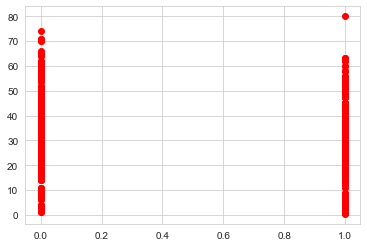

In [51]:
plt.scatter('Survived','Age',data=df_ti,color='red')

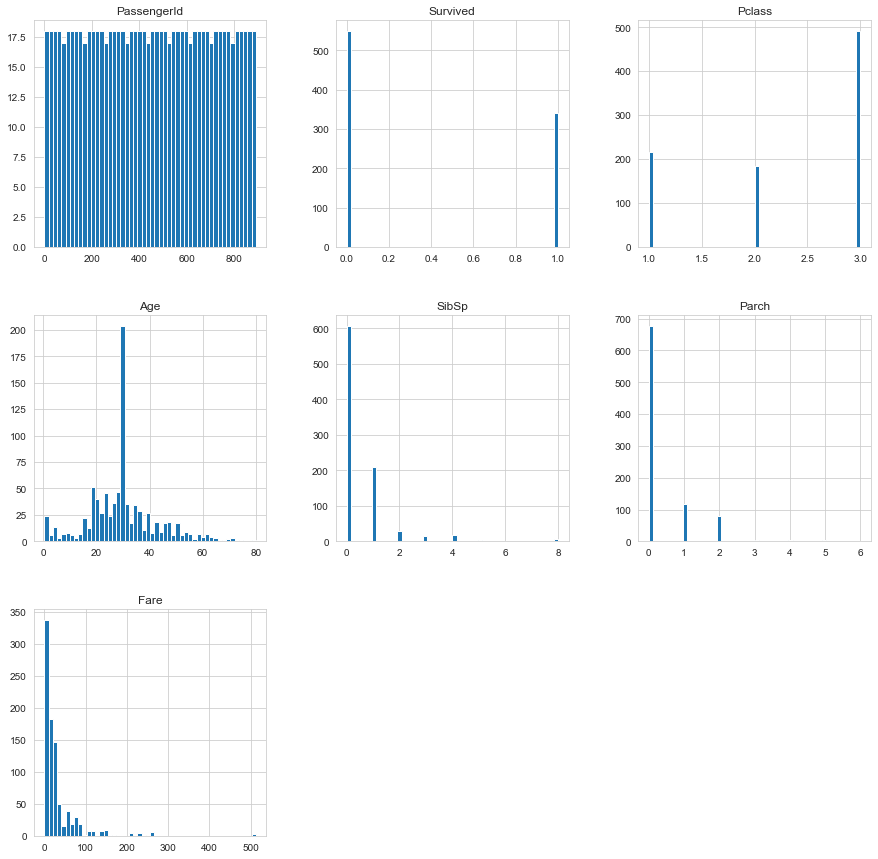

In [52]:
df_ti.hist(figsize=(15,15),bins=50)
plt.show()

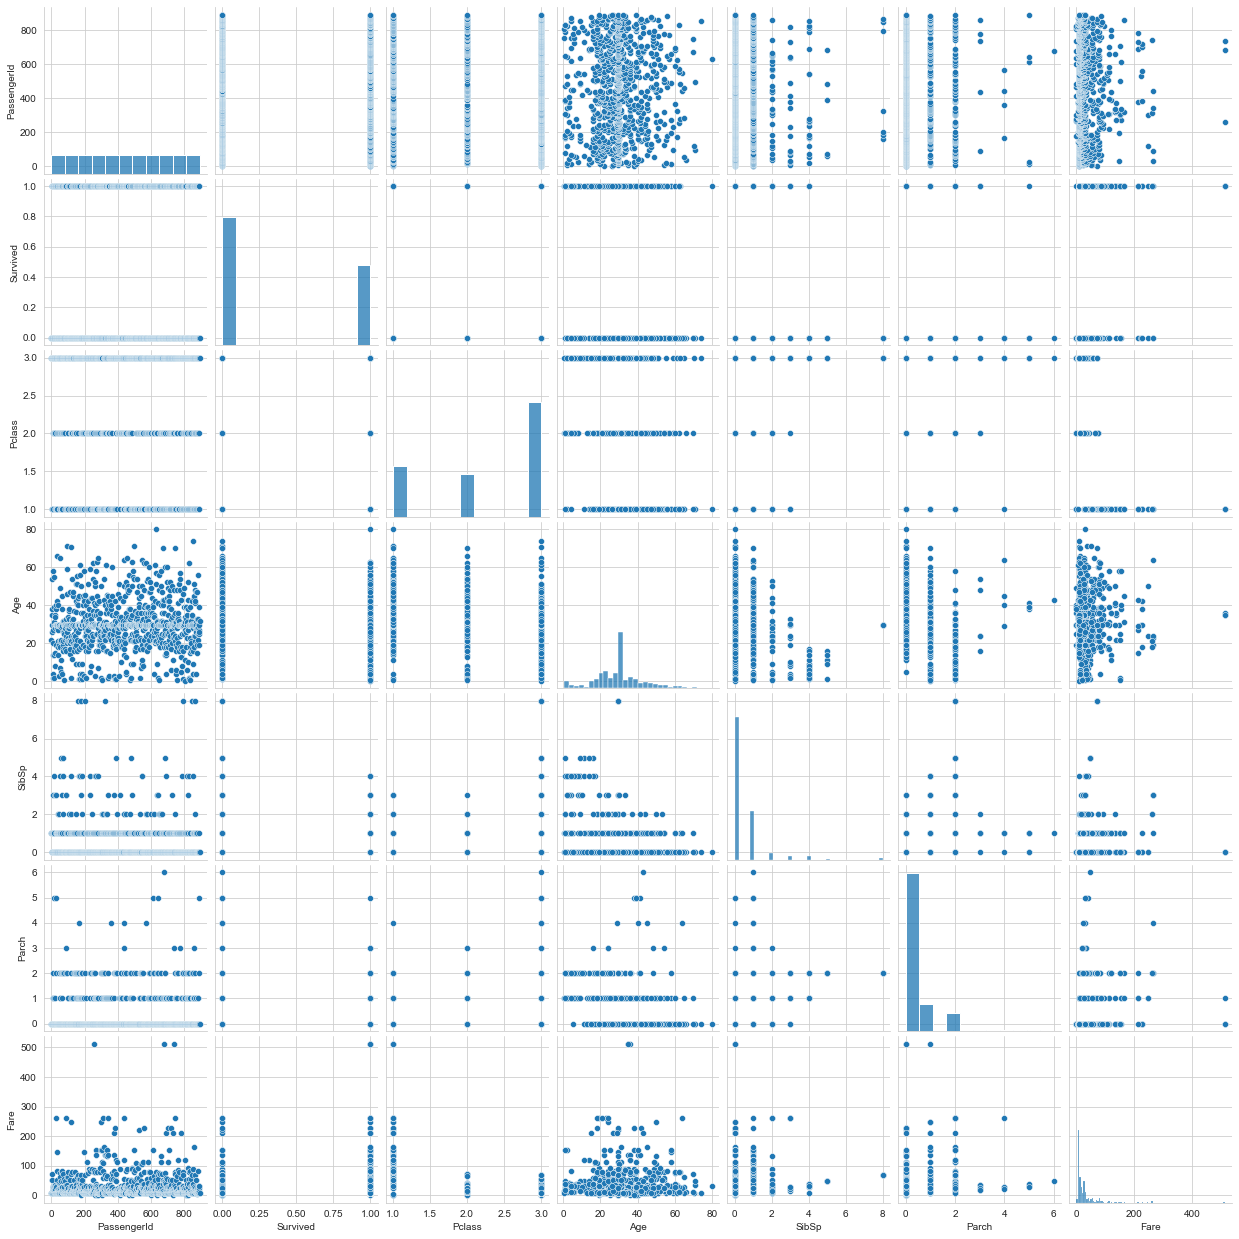

In [53]:
sns.pairplot(df_ti)

# Encoding the Data Frame

In [54]:
df_ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [55]:
df_ti.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [56]:
# Ordinal Encoder is used to encode the dataframe to make it easier to build the model.
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [57]:
for i in df_ti.columns:
    if df_ti[i].dtypes=="object":
        df_ti[i]=oe.fit_transform(df_ti[i].values.reshape(-1,1))

In [58]:
df_ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


# VIF

In [59]:
vif_data= df_ti.drop('Survived',axis=1)

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_ti_sc= sc.fit_transform(vif_data)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
VIF= pd.DataFrame()
VIF['features']= vif_data.columns

In [63]:
VIF['VIF']= [variance_inflation_factor(df_ti_sc,i) for i in range(len(vif_data.columns))]

In [64]:
VIF

,features,VIF
0,PassengerId,1.011223
1,Pclass,1.934940
2,Name,1.013351
3,Sex,1.112724
4,Age,1.216752
5,SibSp,1.288112
6,Parch,1.326618
7,Ticket,1.176317
8,Fare,1.717689
9,Embarked,1.080759


# Outliers

PassengerId       AxesSubplot(0.125,0.536818;0.0824468x0.343182)
Survived       AxesSubplot(0.223936,0.536818;0.0824468x0.343182)
Pclass         AxesSubplot(0.322872,0.536818;0.0824468x0.343182)
Name           AxesSubplot(0.421809,0.536818;0.0824468x0.343182)
Sex            AxesSubplot(0.520745,0.536818;0.0824468x0.343182)
Age            AxesSubplot(0.619681,0.536818;0.0824468x0.343182)
SibSp          AxesSubplot(0.718617,0.536818;0.0824468x0.343182)
Parch          AxesSubplot(0.817553,0.536818;0.0824468x0.343182)
Ticket               AxesSubplot(0.125,0.125;0.0824468x0.343182)
Fare              AxesSubplot(0.223936,0.125;0.0824468x0.343182)
Embarked          AxesSubplot(0.322872,0.125;0.0824468x0.343182)
dtype: object

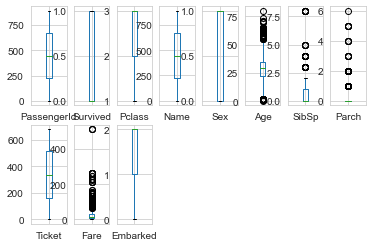

In [65]:
df_ti.plot(kind='box',subplots=True,layout=(2,8))

We can see outliers are present in "Age", "Parch", "SibSp" & "Fare".

# Removing Outliers

Z-Score is used to remove outliers.

In [66]:
from scipy.stats import zscore
z=np.abs(zscore(df_ti))
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([7, 6, 7, 9, 6, 6, 6, 6, 7, 9, 5, 5, 9, 6, 6, 6, 7, 6, 6, 6, 6, 6,
       9, 6, 6, 6, 9, 9, 6, 9, 7, 9, 9, 6, 7, 7, 9, 6, 5, 9, 6, 6, 9, 7,
       7, 5, 7, 5, 7, 9, 6, 6, 9, 9, 9, 9, 7, 9, 9, 5, 7, 9, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 7], dtype=int64))


In [67]:
# New data frame
df_new_ti=df_ti[(z<3).all(axis=1)]
df_new_ti

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,108.0,1.0,22.000000,1,0,523.0,7.2500,2.0
1,2,1,1,190.0,0.0,38.000000,1,0,596.0,71.2833,0.0
2,3,1,3,353.0,0.0,26.000000,0,0,669.0,7.9250,2.0
3,4,1,1,272.0,0.0,35.000000,1,0,49.0,53.1000,2.0
4,5,0,3,15.0,1.0,35.000000,0,0,472.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548.0,1.0,27.000000,0,0,101.0,13.0000,2.0
887,888,1,1,303.0,0.0,19.000000,0,0,14.0,30.0000,2.0
888,889,0,3,413.0,0.0,29.699118,1,2,675.0,23.4500,2.0
889,890,1,1,81.0,1.0,26.000000,0,0,8.0,30.0000,0.0


In [68]:
df_new_ti.shape

(820, 11)

In [69]:
df_ti.shape

(891, 11)

In [70]:
Data_loss=((891-820)/891)*100
Data_loss

7.968574635241302

The data loss is 7.96 %

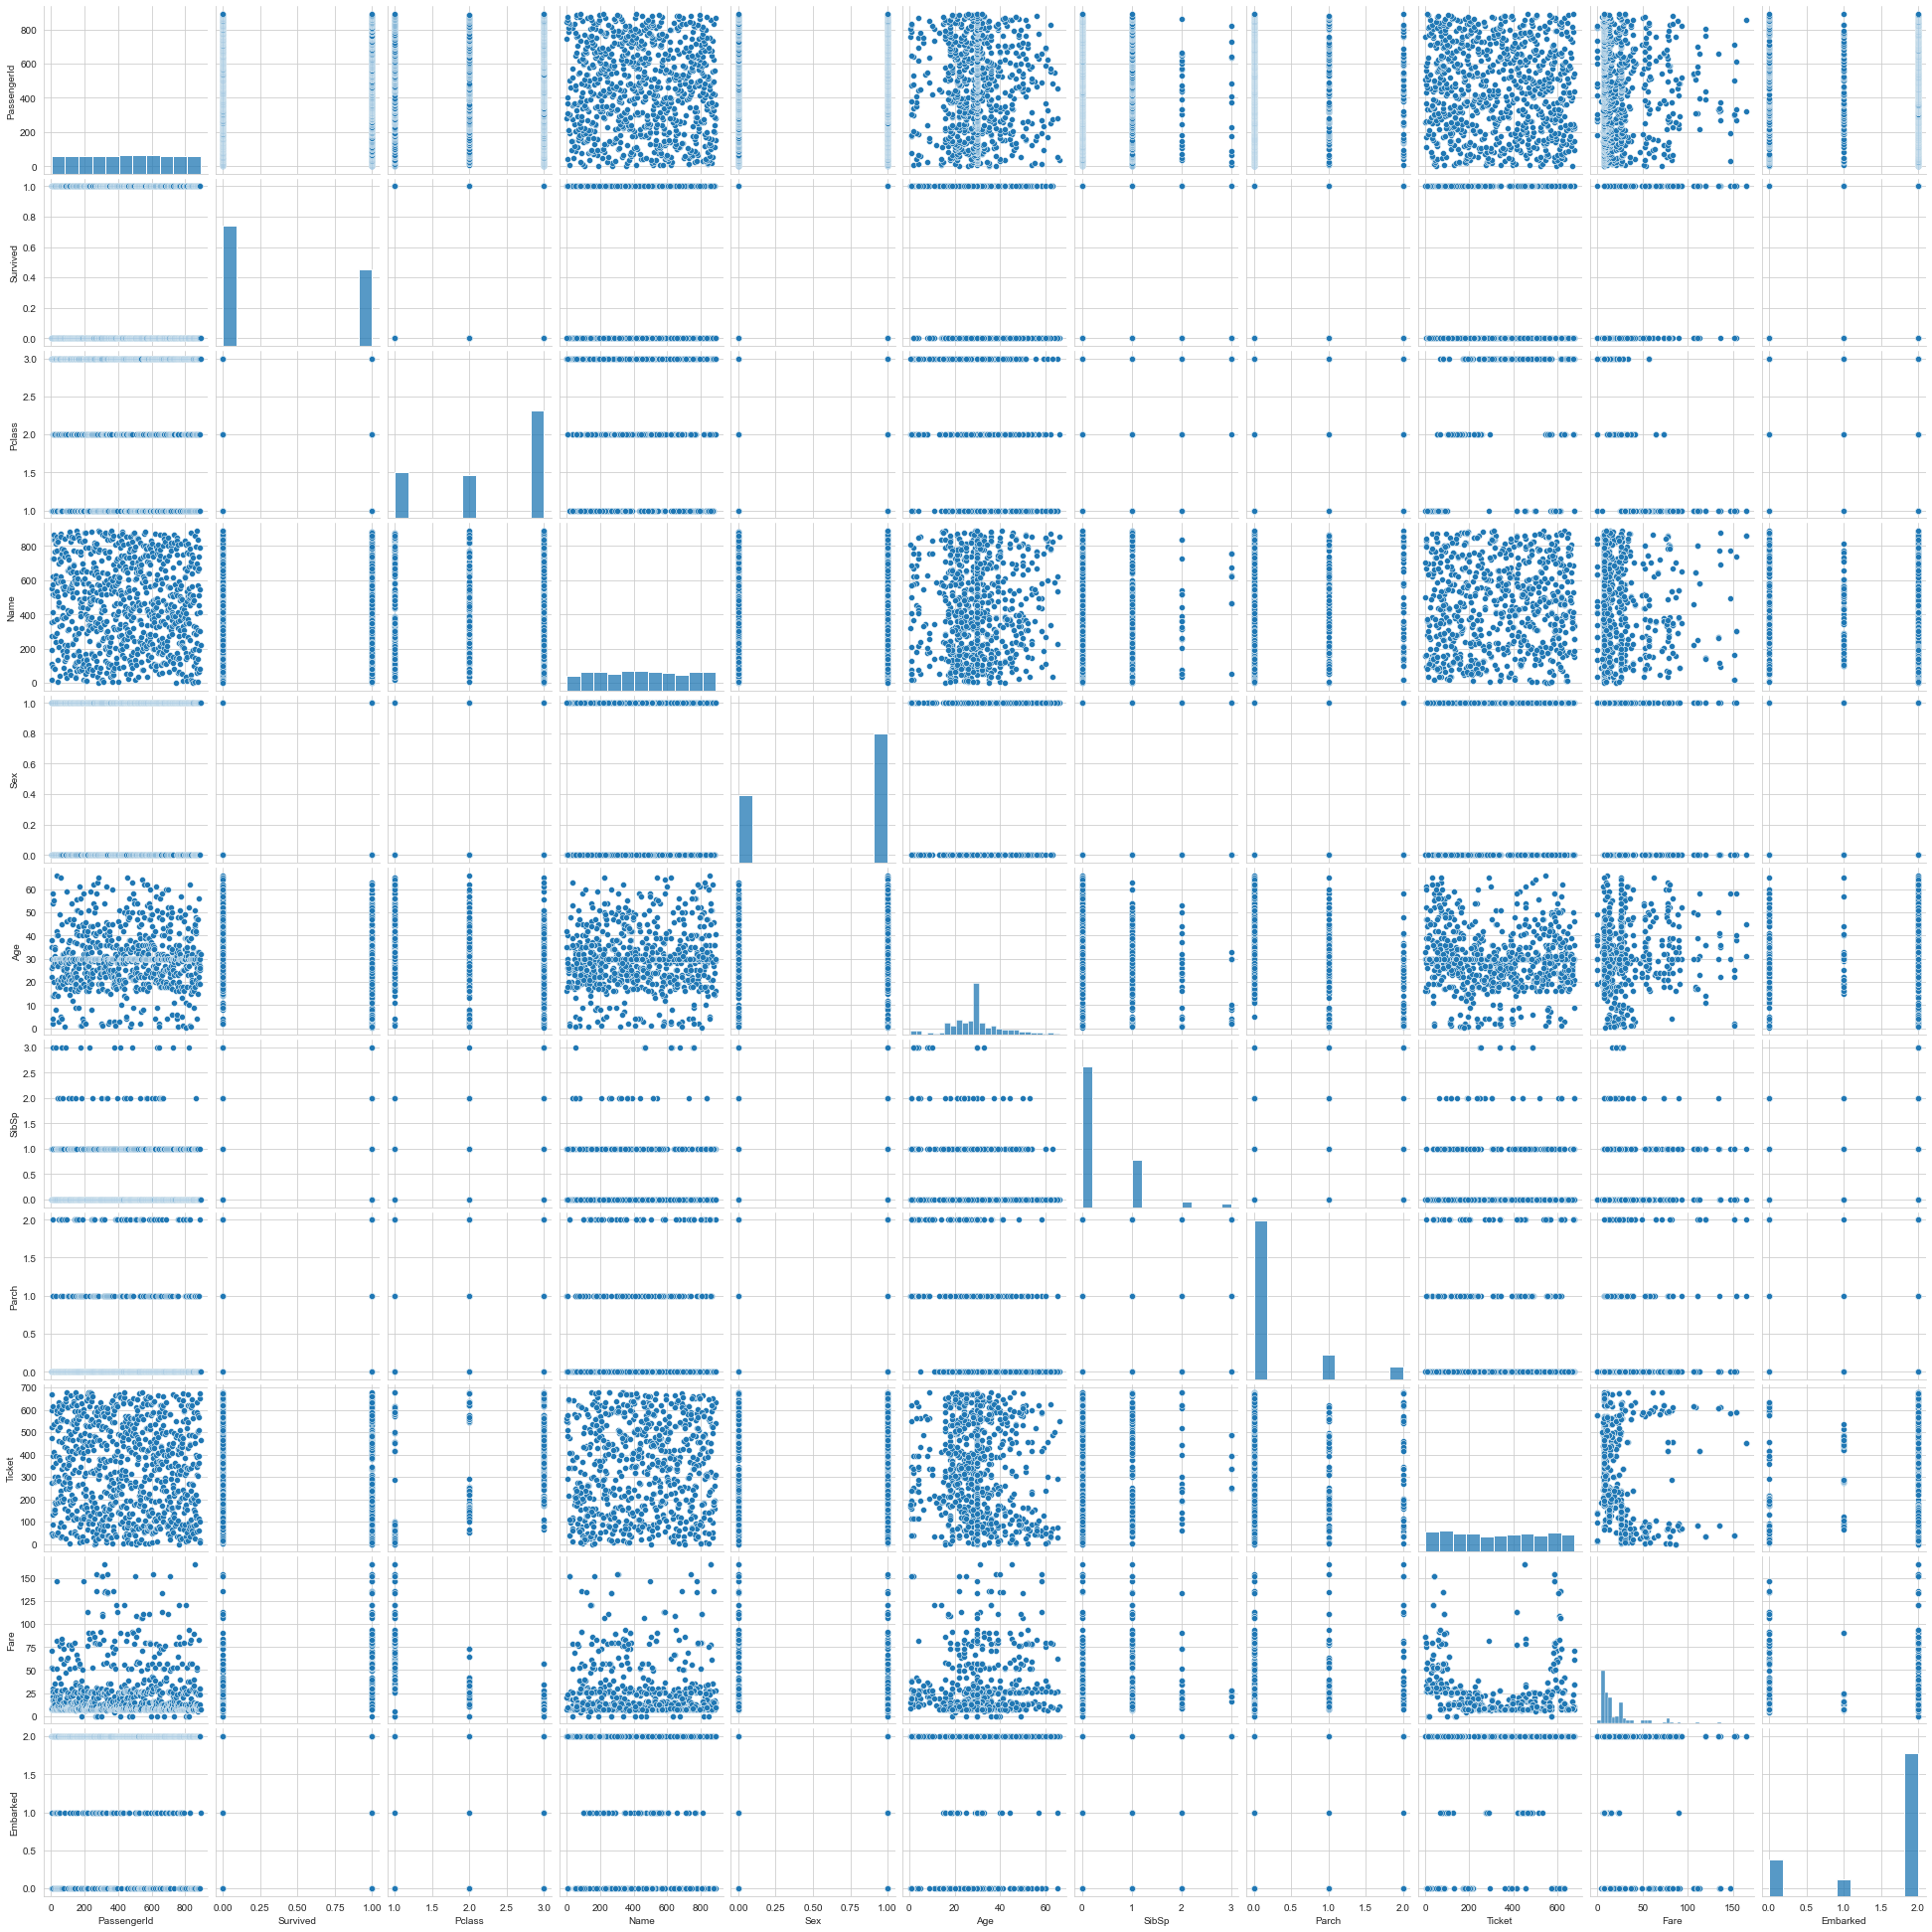

In [71]:
sns.pairplot(df_new_ti)

# Model Building

In [72]:
df_new_ti.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [73]:
df_new_ti.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name           float64
Sex            float64
Age            float64
SibSp            int64
Parch            int64
Ticket         float64
Fare           float64
Embarked       float64
dtype: object

Dropping 'Name' & 'Ticket' columns as they are not useful to our target variable, and also because they might decrease the accuracy of our model. 

In [74]:
df_new_ti=df_new_ti.drop(columns=['Name','Ticket'],axis=1)

In [75]:
# dividing the dataset into independent and dependent variables
x=df_new_ti.drop("Survived", axis=1)
y=df_new_ti["Survived"]

In [76]:
x.shape

(820, 8)

In [77]:
y.shape

(820,)

In [78]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

# SMOTE

In [79]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over, y_over = sm.fit_resample(x,y)

In [80]:
type(x_over)

numpy.ndarray

In [81]:
type(y_over)

pandas.core.series.Series

In [82]:
y_over.value_counts()

0    500
1    500
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

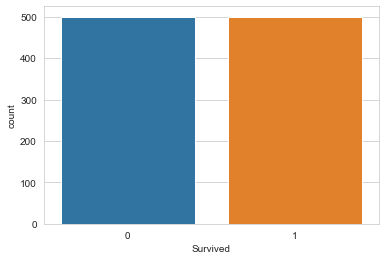

In [83]:
sns.countplot(y_over)

# Best Random State

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [85]:
maxAccu=0
maxRS=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.20, random_state = i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predrs=lr.predict(x_test)
    acc=accuracy_score(y_test,predrs)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is :",maxAccu," on Random State :",maxRS)

Best accuracy is : 0.8658536585365854  on Random State : 14


In [86]:
# dividing the dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2, random_state = 14)

In [87]:
x_train.shape

(656, 8)

In [88]:
y_train.shape

(656,)

In [89]:
x_test.shape

(164, 8)

In [90]:
y_test.shape

(164,)

In [91]:
# scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [93]:
lg=LogisticRegression()
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
pred_lg=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.8536585365853658
[[84  7]
 [17 56]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        91
           1       0.89      0.77      0.82        73

    accuracy                           0.85       164
   macro avg       0.86      0.85      0.85       164
weighted avg       0.86      0.85      0.85       164



# Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

In [95]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

accuracy score:  0.8048780487804879
[[77 14]
 [18 55]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        91
           1       0.80      0.75      0.77        73

    accuracy                           0.80       164
   macro avg       0.80      0.80      0.80       164
weighted avg       0.80      0.80      0.80       164



# KNearest Neighbor Classifier

In [96]:
from sklearn.neighbors import KNeighborsClassifier

In [97]:
knn=KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
pred_knn=knn.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

accuracy score:  0.8109756097560976
[[80 11]
 [20 53]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        91
           1       0.83      0.73      0.77        73

    accuracy                           0.81       164
   macro avg       0.81      0.80      0.81       164
weighted avg       0.81      0.81      0.81       164



# GaussianNB Classifier

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
pred_gnb=gnb.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_gnb))
print(confusion_matrix(y_test,pred_gnb))
print(classification_report(y_test,pred_gnb))

accuracy score:  0.8048780487804879
[[86  5]
 [27 46]]
              precision    recall  f1-score   support

           0       0.76      0.95      0.84        91
           1       0.90      0.63      0.74        73

    accuracy                           0.80       164
   macro avg       0.83      0.79      0.79       164
weighted avg       0.82      0.80      0.80       164



# Support Vector Machine

In [100]:
from sklearn.svm import SVC

In [101]:
svc = SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
svc_pred = svc.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,svc_pred))
print(confusion_matrix(y_test,svc_pred))
print(classification_report(y_test,svc_pred))

accuracy score:  0.8475609756097561
[[86  5]
 [20 53]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        91
           1       0.91      0.73      0.81        73

    accuracy                           0.85       164
   macro avg       0.86      0.84      0.84       164
weighted avg       0.86      0.85      0.84       164



# Random Forest Classifier

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)
pred_rfc=rfc.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))
print(classification_report(y_test,pred_rfc))

accuracy score:  0.8414634146341463
[[87  4]
 [22 51]]
              precision    recall  f1-score   support

           0       0.80      0.96      0.87        91
           1       0.93      0.70      0.80        73

    accuracy                           0.84       164
   macro avg       0.86      0.83      0.83       164
weighted avg       0.86      0.84      0.84       164



From the above observations, the highest accuracy score belong to Logistic Regression, followed by Support Vector Machine and Random Forest Classifier. Next, KNearest Neighbors Classifier and lastly, Decision Tree Classifier and GaussianNB Classifier have the lowest accuracy scores.

# Cross Validation

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
scr_lg=cross_val_score(lg,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg.mean())

Cross validation score of this model is:  0.7914634146341465


In [106]:
scr_dtc=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_dtc.mean())

Cross validation score of this model is:  0.7536585365853659


In [107]:
scr_knn=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of this model is: ",scr_knn.mean())

Cross validation score of this model is:  0.7951219512195121


In [108]:
scr_gnb=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of this model is: ",scr_gnb.mean())

Cross validation score of this model is:  0.7768292682926828


In [109]:
scr_svc=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc.mean())

Cross validation score of this model is:  0.8219512195121952


In [110]:
scr_rfc=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc.mean())

Cross validation score of this model is:  0.7987804878048781


After Cross Validation, the highest scores belong to SVM and Random Forest Classifier. Followed by KNearest Neighbors Classifer and Logistic Regression. Lastly, GaussianNB Classifier and Decision Tree Classifier.

# Hyper Parameter Tuning

Since the scores of Logistic Regression, Random Forest Classifier and Support Vector Machine are the highest, we will do their hyper parameter tuning with Grid Search CV.

In [111]:
from sklearn.model_selection import GridSearchCV

# SVM

In [112]:
parameters = {
    'C': [0.8,0.9,1,1.2,1.4],
    'kernel':['linear', 'rbf','poly'],
    'degree':[1,2,3],
    'random_state':[1,2,3,None],
    'gamma' :[0.8,0.9,1,1.1,1.2,1.3]}
grid_svc = GridSearchCV(svc, param_grid = parameters, scoring = 'accuracy', cv = 10)

In [113]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.8, 0.9, 1, 1.2, 1.4], 'degree': [1, 2, 3],
                         'gamma': [0.8, 0.9, 1, 1.1, 1.2, 1.3],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'random_state': [1, 2, 3, None]},
             scoring='accuracy')

In [114]:
grid_svc.best_params_

{'C': 1.4, 'degree': 2, 'gamma': 1, 'kernel': 'poly', 'random_state': 1}

In [115]:
svc1=SVC(C=1.4,gamma=1,kernel='poly',degree=2,random_state=1)

svc1.fit(x_train,y_train)
pred1=svc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred1))
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

accuracy score:  0.8353658536585366
[[84  7]
 [20 53]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        91
           1       0.88      0.73      0.80        73

    accuracy                           0.84       164
   macro avg       0.85      0.82      0.83       164
weighted avg       0.84      0.84      0.83       164



# Random Forest Classifier

In [116]:
parameters1={
    'bootstrap': [True, False],
    'max_depth': [10, 20],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split':[1,2,3,4],
    'criterion':['gini','entropy'],
    'n_estimators': [100,200,300]}
grid_rfc = GridSearchCV(rfc, param_grid = parameters1, scoring = 'accuracy', cv = 10)

In [117]:
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [118]:
grid_rfc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [119]:
rfc1=RandomForestClassifier(bootstrap=True,max_depth=10,max_features='sqrt',n_estimators=100,criterion='gini',min_samples_split=2)

rfc1.fit(x_train,y_train)
pred_rf1=rfc1.predict(x_test)
print("accuracy score: ",accuracy_score(y_test,pred_rf1))
print(confusion_matrix(y_test,pred_rf1))
print(classification_report(y_test,pred_rf1))

accuracy score:  0.8597560975609756
[[87  4]
 [19 54]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.88        91
           1       0.93      0.74      0.82        73

    accuracy                           0.86       164
   macro avg       0.88      0.85      0.85       164
weighted avg       0.87      0.86      0.86       164



# Logistic Regression

In [120]:
parameters2={
    'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
    'random_state':[1,2,3,4,None],
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'penalty':['l1','l2','elasticnet','none']}
grid_lg = GridSearchCV(lg, param_grid = parameters2, scoring = 'accuracy', cv = 10)

In [121]:
grid_lg.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'random_state': [1, 2, 3, 4, None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [122]:
grid_lg.best_params_

{'C': 0.8, 'penalty': 'none', 'random_state': 1, 'solver': 'newton-cg'}

In [123]:
lg1=LogisticRegression(solver='newton-cg',random_state=1,C=0.8,penalty='none')

lg1.fit(x_train, y_train)
lg1.score(x_train, y_train)
pred_lg1=lg.predict(x_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg1))
print(confusion_matrix(y_test,pred_lg1))
print(classification_report(y_test,pred_lg1))

accuracy score:  0.8536585365853658
[[84  7]
 [17 56]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87        91
           1       0.89      0.77      0.82        73

    accuracy                           0.85       164
   macro avg       0.86      0.85      0.85       164
weighted avg       0.86      0.85      0.85       164



# Cross Validation

In [124]:
scr_svc1=cross_val_score(svc1,x,y,cv=5)
print("Cross validation score of this model is: ",scr_svc1.mean())

Cross validation score of this model is:  0.8207317073170731


In [125]:
scr_rfc1=cross_val_score(rfc1,x,y,cv=5)
print("Cross validation score of this model is: ",scr_rfc1.mean())

Cross validation score of this model is:  0.802439024390244


In [126]:
scr_lg1=cross_val_score(lg1,x,y,cv=5)
print("Cross validation score of this model is: ",scr_lg1.mean())

Cross validation score of this model is:  0.7890243902439025


After Hyper Parameter Tuning, the accuracy score of Random Forest Classifier Model is the highest, followed by Logistic Regression and SVC.  

Also, the Cross Validation Score of SVC is the highest after hyper parameter tuning followed by Random Forest Classifier and Logistic Regression.

# ROC AUC Plot

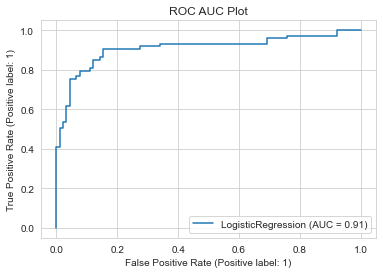

In [127]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(lg1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

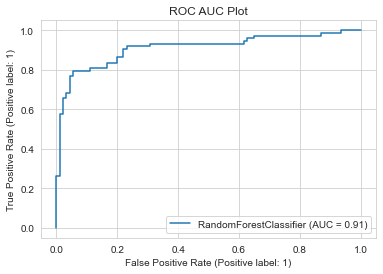

In [128]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rfc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

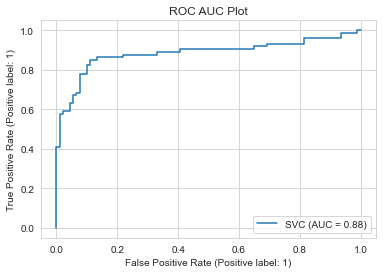

In [129]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svc1,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

The AUC score of Logistic Regression and Random Forest Classifier are both 91 %. SVC got an AUC score of 88 %.

# Saving model

Since both Logistic Regression and Random Forest Classifier are showing the same AUC Score we can save any one of them.

In [130]:
import pickle
filename='titanic.pkl'
pickle.dump(lg1,open(filename,'wb'))